In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.shape

(8124, 23)

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# conver catogorical data into numbers

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
label=le.fit_transform(data["class"])
label

array([1, 0, 0, ..., 0, 1, 0])

In [10]:
le.classes_

array(['e', 'p'], dtype=object)

In [11]:
data=data.drop("class",axis='columns')

In [12]:
data.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g


In [13]:
data["class"]=label

In [14]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,0
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,0
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,0
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,1


In [15]:
le=LabelEncoder()
label=le.fit_transform(data["cap-shape"])
label

array([5, 5, 0, ..., 2, 3, 5])

In [16]:
le.classes_

array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object)

In [17]:
data=data.drop("cap-shape",axis='columns')

In [18]:
data.head(2)

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,s,n,t,p,f,c,n,k,e,e,...,w,w,p,w,o,p,k,s,u,1
1,s,y,t,a,f,c,b,k,e,c,...,w,w,p,w,o,p,n,n,g,0


In [19]:
data["cap-shape"]=label

In [20]:
data

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape
0,s,n,t,p,f,c,n,k,e,e,...,w,p,w,o,p,k,s,u,1,5
1,s,y,t,a,f,c,b,k,e,c,...,w,p,w,o,p,n,n,g,0,5
2,s,w,t,l,f,c,b,n,e,c,...,w,p,w,o,p,n,n,m,0,0
3,y,w,t,p,f,c,n,n,e,e,...,w,p,w,o,p,k,s,u,1,5
4,s,g,f,n,f,w,b,k,t,e,...,w,p,w,o,e,n,a,g,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,n,f,n,a,c,b,y,e,?,...,o,p,o,o,p,b,c,l,0,3
8120,s,n,f,n,a,c,b,y,e,?,...,o,p,n,o,p,b,v,l,0,5
8121,s,n,f,n,a,c,b,n,e,?,...,o,p,o,o,p,b,c,l,0,2
8122,y,n,f,y,f,c,n,b,t,?,...,w,p,w,o,e,w,v,l,1,3


In [21]:
le=LabelEncoder()
label=le.fit_transform(data["cap-surface"])
label

array([2, 2, 2, ..., 2, 3, 2])

In [22]:
le.classes_

array(['f', 'g', 's', 'y'], dtype=object)

In [23]:
data=data.drop("cap-surface",axis='columns')

In [24]:
data["cap-surface"]=label

In [25]:
data

,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface
0,n,t,p,f,c,n,k,e,e,s,...,p,w,o,p,k,s,u,1,5,2
1,y,t,a,f,c,b,k,e,c,s,...,p,w,o,p,n,n,g,0,5,2
2,w,t,l,f,c,b,n,e,c,s,...,p,w,o,p,n,n,m,0,0,2
3,w,t,p,f,c,n,n,e,e,s,...,p,w,o,p,k,s,u,1,5,3
4,g,f,n,f,w,b,k,t,e,s,...,p,w,o,e,n,a,g,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,n,f,n,a,c,b,y,e,?,s,...,p,o,o,p,b,c,l,0,3,2
8120,n,f,n,a,c,b,y,e,?,s,...,p,n,o,p,b,v,l,0,5,2
8121,n,f,n,a,c,b,n,e,?,s,...,p,o,o,p,b,c,l,0,2,2
8122,n,f,y,f,c,n,b,t,?,s,...,p,w,o,e,w,v,l,1,3,3


In [26]:
le=LabelEncoder()
label=le.fit_transform(data["cap-color"])
label

array([4, 9, 8, ..., 4, 4, 4])

In [27]:
data=data.drop("cap-color",axis='columns')

In [28]:
data["cap-color"]=label

In [29]:
data

,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color
0,t,p,f,c,n,k,e,e,s,s,...,w,o,p,k,s,u,1,5,2,4
1,t,a,f,c,b,k,e,c,s,s,...,w,o,p,n,n,g,0,5,2,9
2,t,l,f,c,b,n,e,c,s,s,...,w,o,p,n,n,m,0,0,2,8
3,t,p,f,c,n,n,e,e,s,s,...,w,o,p,k,s,u,1,5,3,8
4,f,n,f,w,b,k,t,e,s,s,...,w,o,e,n,a,g,0,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,f,n,a,c,b,y,e,?,s,s,...,o,o,p,b,c,l,0,3,2,4
8120,f,n,a,c,b,y,e,?,s,s,...,n,o,p,b,v,l,0,5,2,4
8121,f,n,a,c,b,n,e,?,s,s,...,o,o,p,b,c,l,0,2,2,4
8122,f,y,f,c,n,b,t,?,s,k,...,w,o,e,w,v,l,1,3,3,4


In [30]:
le=LabelEncoder()
label=le.fit_transform(data["bruises"])
label

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
data=data.drop("bruises",axis='columns')

In [32]:
data["bruises"]=label

In [33]:
data

,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,...,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises
0,p,f,c,n,k,e,e,s,s,w,...,o,p,k,s,u,1,5,2,4,1
1,a,f,c,b,k,e,c,s,s,w,...,o,p,n,n,g,0,5,2,9,1
2,l,f,c,b,n,e,c,s,s,w,...,o,p,n,n,m,0,0,2,8,1
3,p,f,c,n,n,e,e,s,s,w,...,o,p,k,s,u,1,5,3,8,1
4,n,f,w,b,k,t,e,s,s,w,...,o,e,n,a,g,0,5,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,n,a,c,b,y,e,?,s,s,o,...,o,p,b,c,l,0,3,2,4,0
8120,n,a,c,b,y,e,?,s,s,o,...,o,p,b,v,l,0,5,2,4,0
8121,n,a,c,b,n,e,?,s,s,o,...,o,p,b,c,l,0,2,2,4,0
8122,y,f,c,n,b,t,?,s,k,w,...,o,e,w,v,l,1,3,3,4,0


In [34]:
le=LabelEncoder()
label=le.fit_transform(data["odor"])
label

array([6, 0, 3, ..., 5, 8, 5])

In [35]:
data=data.drop("odor",axis='columns')

In [36]:
data["odor"]=label

In [37]:
data

,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor
0,f,c,n,k,e,e,s,s,w,w,...,p,k,s,u,1,5,2,4,1,6
1,f,c,b,k,e,c,s,s,w,w,...,p,n,n,g,0,5,2,9,1,0
2,f,c,b,n,e,c,s,s,w,w,...,p,n,n,m,0,0,2,8,1,3
3,f,c,n,n,e,e,s,s,w,w,...,p,k,s,u,1,5,3,8,1,6
4,f,w,b,k,t,e,s,s,w,w,...,e,n,a,g,0,5,2,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,a,c,b,y,e,?,s,s,o,o,...,p,b,c,l,0,3,2,4,0,5
8120,a,c,b,y,e,?,s,s,o,o,...,p,b,v,l,0,5,2,4,0,5
8121,a,c,b,n,e,?,s,s,o,o,...,p,b,c,l,0,2,2,4,0,5
8122,f,c,n,b,t,?,s,k,w,w,...,e,w,v,l,1,3,3,4,0,8


In [38]:
le=LabelEncoder()
label=le.fit_transform(data["gill-attachment"])
label

array([1, 1, 1, ..., 0, 1, 0])

In [39]:
data=data.drop("gill-attachment",axis='columns')

In [40]:
data["gill-attachment"]=label

In [41]:
data

,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,...,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment
0,c,n,k,e,e,s,s,w,w,p,...,k,s,u,1,5,2,4,1,6,1
1,c,b,k,e,c,s,s,w,w,p,...,n,n,g,0,5,2,9,1,0,1
2,c,b,n,e,c,s,s,w,w,p,...,n,n,m,0,0,2,8,1,3,1
3,c,n,n,e,e,s,s,w,w,p,...,k,s,u,1,5,3,8,1,6,1
4,w,b,k,t,e,s,s,w,w,p,...,n,a,g,0,5,2,3,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,c,b,y,e,?,s,s,o,o,p,...,b,c,l,0,3,2,4,0,5,0
8120,c,b,y,e,?,s,s,o,o,p,...,b,v,l,0,5,2,4,0,5,0
8121,c,b,n,e,?,s,s,o,o,p,...,b,c,l,0,2,2,4,0,5,0
8122,c,n,b,t,?,s,k,w,w,p,...,w,v,l,1,3,3,4,0,8,1


In [42]:
le=LabelEncoder()
label=le.fit_transform(data["gill-spacing"])
label

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
data=data.drop("gill-spacing",axis='columns')

In [44]:
data["gill-spacing"]=label

In [45]:
data

,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,...,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing
0,n,k,e,e,s,s,w,w,p,w,...,s,u,1,5,2,4,1,6,1,0
1,b,k,e,c,s,s,w,w,p,w,...,n,g,0,5,2,9,1,0,1,0
2,b,n,e,c,s,s,w,w,p,w,...,n,m,0,0,2,8,1,3,1,0
3,n,n,e,e,s,s,w,w,p,w,...,s,u,1,5,3,8,1,6,1,0
4,b,k,t,e,s,s,w,w,p,w,...,a,g,0,5,2,3,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b,y,e,?,s,s,o,o,p,o,...,c,l,0,3,2,4,0,5,0,0
8120,b,y,e,?,s,s,o,o,p,n,...,v,l,0,5,2,4,0,5,0,0
8121,b,n,e,?,s,s,o,o,p,o,...,c,l,0,2,2,4,0,5,0,0
8122,n,b,t,?,s,k,w,w,p,w,...,v,l,1,3,3,4,0,8,1,0


In [46]:
le=LabelEncoder()
label=le.fit_transform(data["gill-size"])
label

array([1, 0, 0, ..., 0, 1, 0])

In [47]:
data=data.drop("gill-size",axis='columns')

In [48]:
data["gill-size"]=label

In [49]:
data

,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,...,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size
0,k,e,e,s,s,w,w,p,w,o,...,u,1,5,2,4,1,6,1,0,1
1,k,e,c,s,s,w,w,p,w,o,...,g,0,5,2,9,1,0,1,0,0
2,n,e,c,s,s,w,w,p,w,o,...,m,0,0,2,8,1,3,1,0,0
3,n,e,e,s,s,w,w,p,w,o,...,u,1,5,3,8,1,6,1,0,1
4,k,t,e,s,s,w,w,p,w,o,...,g,0,5,2,3,0,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,y,e,?,s,s,o,o,p,o,o,...,l,0,3,2,4,0,5,0,0,0
8120,y,e,?,s,s,o,o,p,n,o,...,l,0,5,2,4,0,5,0,0,0
8121,n,e,?,s,s,o,o,p,o,o,...,l,0,2,2,4,0,5,0,0,0
8122,b,t,?,s,k,w,w,p,w,o,...,l,1,3,3,4,0,8,1,0,1


In [50]:
le=LabelEncoder()
label=le.fit_transform(data["gill-color"])
label

array([ 4,  4,  5, ...,  5,  0, 11])

In [51]:
data=data.drop("gill-color",axis='columns')

In [52]:
data["gill-color"]=label

In [53]:
data

,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,...,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color
0,e,e,s,s,w,w,p,w,o,p,...,1,5,2,4,1,6,1,0,1,4
1,e,c,s,s,w,w,p,w,o,p,...,0,5,2,9,1,0,1,0,0,4
2,e,c,s,s,w,w,p,w,o,p,...,0,0,2,8,1,3,1,0,0,5
3,e,e,s,s,w,w,p,w,o,p,...,1,5,3,8,1,6,1,0,1,5
4,t,e,s,s,w,w,p,w,o,e,...,0,5,2,3,0,5,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,?,s,s,o,o,p,o,o,p,...,0,3,2,4,0,5,0,0,0,11
8120,e,?,s,s,o,o,p,n,o,p,...,0,5,2,4,0,5,0,0,0,11
8121,e,?,s,s,o,o,p,o,o,p,...,0,2,2,4,0,5,0,0,0,5
8122,t,?,s,k,w,w,p,w,o,e,...,1,3,3,4,0,8,1,0,1,0


In [54]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-shape"])
label

array([0, 0, 0, ..., 0, 1, 0])

In [55]:
data=data.drop("stalk-shape",axis='columns')

In [56]:
data["stalk-shape"]=label

In [57]:
data

,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,...,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape
0,e,s,s,w,w,p,w,o,p,k,...,5,2,4,1,6,1,0,1,4,0
1,c,s,s,w,w,p,w,o,p,n,...,5,2,9,1,0,1,0,0,4,0
2,c,s,s,w,w,p,w,o,p,n,...,0,2,8,1,3,1,0,0,5,0
3,e,s,s,w,w,p,w,o,p,k,...,5,3,8,1,6,1,0,1,5,0
4,e,s,s,w,w,p,w,o,e,n,...,5,2,3,0,5,1,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,?,s,s,o,o,p,o,o,p,b,...,3,2,4,0,5,0,0,0,11,0
8120,?,s,s,o,o,p,n,o,p,b,...,5,2,4,0,5,0,0,0,11,0
8121,?,s,s,o,o,p,o,o,p,b,...,2,2,4,0,5,0,0,0,5,0
8122,?,s,k,w,w,p,w,o,e,w,...,3,3,4,0,8,1,0,1,0,1


In [58]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-root"])
label

array([3, 2, 2, ..., 0, 0, 0])

In [59]:
data=data.drop("stalk-root",axis='columns')

In [60]:
data["stalk-root"]=label

In [61]:
data

,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,...,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root
0,s,s,w,w,p,w,o,p,k,s,...,2,4,1,6,1,0,1,4,0,3
1,s,s,w,w,p,w,o,p,n,n,...,2,9,1,0,1,0,0,4,0,2
2,s,s,w,w,p,w,o,p,n,n,...,2,8,1,3,1,0,0,5,0,2
3,s,s,w,w,p,w,o,p,k,s,...,3,8,1,6,1,0,1,5,0,3
4,s,s,w,w,p,w,o,e,n,a,...,2,3,0,5,1,1,0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,s,o,o,p,o,o,p,b,c,...,2,4,0,5,0,0,0,11,0,0
8120,s,s,o,o,p,n,o,p,b,v,...,2,4,0,5,0,0,0,11,0,0
8121,s,s,o,o,p,o,o,p,b,c,...,2,4,0,5,0,0,0,5,0,0
8122,s,k,w,w,p,w,o,e,w,v,...,3,4,0,8,1,0,1,0,1,0


In [62]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-surface-above-ring"])
label

array([2, 2, 2, ..., 2, 2, 2])

In [63]:
data=data.drop("stalk-surface-above-ring",axis='columns')

In [64]:
data["stalk-surface-above-ring"]=label

In [65]:
data

,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,...,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring
0,s,w,w,p,w,o,p,k,s,u,...,4,1,6,1,0,1,4,0,3,2
1,s,w,w,p,w,o,p,n,n,g,...,9,1,0,1,0,0,4,0,2,2
2,s,w,w,p,w,o,p,n,n,m,...,8,1,3,1,0,0,5,0,2,2
3,s,w,w,p,w,o,p,k,s,u,...,8,1,6,1,0,1,5,0,3,2
4,s,w,w,p,w,o,e,n,a,g,...,3,0,5,1,1,0,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,o,o,p,o,o,p,b,c,l,...,4,0,5,0,0,0,11,0,0,2
8120,s,o,o,p,n,o,p,b,v,l,...,4,0,5,0,0,0,11,0,0,2
8121,s,o,o,p,o,o,p,b,c,l,...,4,0,5,0,0,0,5,0,0,2
8122,k,w,w,p,w,o,e,w,v,l,...,4,0,8,1,0,1,0,1,0,2


In [66]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-surface-below-ring"])
label

array([2, 2, 2, ..., 2, 1, 2])

In [67]:
data=data.drop("stalk-surface-below-ring",axis='columns')

In [68]:
data["stalk-surface-below-ring"]=label

In [69]:
data

,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,...,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring
0,w,w,p,w,o,p,k,s,u,1,...,1,6,1,0,1,4,0,3,2,2
1,w,w,p,w,o,p,n,n,g,0,...,1,0,1,0,0,4,0,2,2,2
2,w,w,p,w,o,p,n,n,m,0,...,1,3,1,0,0,5,0,2,2,2
3,w,w,p,w,o,p,k,s,u,1,...,1,6,1,0,1,5,0,3,2,2
4,w,w,p,w,o,e,n,a,g,0,...,0,5,1,1,0,4,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,o,o,p,o,o,p,b,c,l,0,...,0,5,0,0,0,11,0,0,2,2
8120,o,o,p,n,o,p,b,v,l,0,...,0,5,0,0,0,11,0,0,2,2
8121,o,o,p,o,o,p,b,c,l,0,...,0,5,0,0,0,5,0,0,2,2
8122,w,w,p,w,o,e,w,v,l,1,...,0,8,1,0,1,0,1,0,2,1


In [70]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-color-above-ring"])
label

array([7, 7, 7, ..., 5, 7, 5])

In [71]:
data=data.drop("stalk-color-above-ring",axis='columns')

In [72]:
data["stalk-color-above-ring"]=label

In [73]:
data

,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,...,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring
0,w,p,w,o,p,k,s,u,1,5,...,6,1,0,1,4,0,3,2,2,7
1,w,p,w,o,p,n,n,g,0,5,...,0,1,0,0,4,0,2,2,2,7
2,w,p,w,o,p,n,n,m,0,0,...,3,1,0,0,5,0,2,2,2,7
3,w,p,w,o,p,k,s,u,1,5,...,6,1,0,1,5,0,3,2,2,7
4,w,p,w,o,e,n,a,g,0,5,...,5,1,1,0,4,1,3,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,o,p,o,o,p,b,c,l,0,3,...,5,0,0,0,11,0,0,2,2,5
8120,o,p,n,o,p,b,v,l,0,5,...,5,0,0,0,11,0,0,2,2,5
8121,o,p,o,o,p,b,c,l,0,2,...,5,0,0,0,5,0,0,2,2,5
8122,w,p,w,o,e,w,v,l,1,3,...,8,1,0,1,0,1,0,2,1,7


In [74]:
le=LabelEncoder()
label=le.fit_transform(data["stalk-color-below-ring"])
label

array([7, 7, 7, ..., 5, 7, 5])

In [75]:
data=data.drop("stalk-color-below-ring",axis='columns')

In [76]:
data["stalk-color-below-ring"]=label

In [77]:
data

,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,...,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring
0,p,w,o,p,k,s,u,1,5,2,...,1,0,1,4,0,3,2,2,7,7
1,p,w,o,p,n,n,g,0,5,2,...,1,0,0,4,0,2,2,2,7,7
2,p,w,o,p,n,n,m,0,0,2,...,1,0,0,5,0,2,2,2,7,7
3,p,w,o,p,k,s,u,1,5,3,...,1,0,1,5,0,3,2,2,7,7
4,p,w,o,e,n,a,g,0,5,2,...,1,1,0,4,1,3,2,2,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,p,o,o,p,b,c,l,0,3,2,...,0,0,0,11,0,0,2,2,5,5
8120,p,n,o,p,b,v,l,0,5,2,...,0,0,0,11,0,0,2,2,5,5
8121,p,o,o,p,b,c,l,0,2,2,...,0,0,0,5,0,0,2,2,5,5
8122,p,w,o,e,w,v,l,1,3,3,...,1,0,1,0,1,0,2,1,7,7


In [78]:
le=LabelEncoder()
label=le.fit_transform(data["veil-type"])
label

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
le.classes_

array(['p'], dtype=object)

In [80]:
data=data.drop("veil-type",axis='columns')

In [81]:
data["veil-type"]=label

In [82]:
data

,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,...,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type
0,w,o,p,k,s,u,1,5,2,4,...,0,1,4,0,3,2,2,7,7,0
1,w,o,p,n,n,g,0,5,2,9,...,0,0,4,0,2,2,2,7,7,0
2,w,o,p,n,n,m,0,0,2,8,...,0,0,5,0,2,2,2,7,7,0
3,w,o,p,k,s,u,1,5,3,8,...,0,1,5,0,3,2,2,7,7,0
4,w,o,e,n,a,g,0,5,2,3,...,1,0,4,1,3,2,2,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,o,o,p,b,c,l,0,3,2,4,...,0,0,11,0,0,2,2,5,5,0
8120,n,o,p,b,v,l,0,5,2,4,...,0,0,11,0,0,2,2,5,5,0
8121,o,o,p,b,c,l,0,2,2,4,...,0,0,5,0,0,2,2,5,5,0
8122,w,o,e,w,v,l,1,3,3,4,...,0,1,0,1,0,2,1,7,7,0


In [83]:
le=LabelEncoder()
label=le.fit_transform(data["veil-color"])
label

array([2, 2, 2, ..., 1, 2, 1])

In [84]:
data=data.drop("veil-color",axis='columns')

In [85]:
data["veil-color"]=label

In [86]:
data

,ring-number,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,...,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color
0,o,p,k,s,u,1,5,2,4,1,...,1,4,0,3,2,2,7,7,0,2
1,o,p,n,n,g,0,5,2,9,1,...,0,4,0,2,2,2,7,7,0,2
2,o,p,n,n,m,0,0,2,8,1,...,0,5,0,2,2,2,7,7,0,2
3,o,p,k,s,u,1,5,3,8,1,...,1,5,0,3,2,2,7,7,0,2
4,o,e,n,a,g,0,5,2,3,0,...,0,4,1,3,2,2,7,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,o,p,b,c,l,0,3,2,4,0,...,0,11,0,0,2,2,5,5,0,1
8120,o,p,b,v,l,0,5,2,4,0,...,0,11,0,0,2,2,5,5,0,0
8121,o,p,b,c,l,0,2,2,4,0,...,0,5,0,0,2,2,5,5,0,1
8122,o,e,w,v,l,1,3,3,4,0,...,1,0,1,0,2,1,7,7,0,2


In [87]:
le=LabelEncoder()
label=le.fit_transform(data["ring-number"])
label

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
data=data.drop("ring-number",axis='columns')

In [89]:
data["ring-number"]=label

In [90]:
data

,ring-type,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,...,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number
0,p,k,s,u,1,5,2,4,1,6,...,4,0,3,2,2,7,7,0,2,1
1,p,n,n,g,0,5,2,9,1,0,...,4,0,2,2,2,7,7,0,2,1
2,p,n,n,m,0,0,2,8,1,3,...,5,0,2,2,2,7,7,0,2,1
3,p,k,s,u,1,5,3,8,1,6,...,5,0,3,2,2,7,7,0,2,1
4,e,n,a,g,0,5,2,3,0,5,...,4,1,3,2,2,7,7,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,p,b,c,l,0,3,2,4,0,5,...,11,0,0,2,2,5,5,0,1,1
8120,p,b,v,l,0,5,2,4,0,5,...,11,0,0,2,2,5,5,0,0,1
8121,p,b,c,l,0,2,2,4,0,5,...,5,0,0,2,2,5,5,0,1,1
8122,e,w,v,l,1,3,3,4,0,8,...,0,1,0,2,1,7,7,0,2,1


In [91]:
le=LabelEncoder()
label=le.fit_transform(data["ring-type"])
label

array([4, 4, 4, ..., 4, 0, 4])

In [92]:
data=data.drop("ring-type",axis='columns')

In [93]:
data["ring-type"]=label

In [94]:
data

,spore-print-color,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,...,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type
0,k,s,u,1,5,2,4,1,6,1,...,0,3,2,2,7,7,0,2,1,4
1,n,n,g,0,5,2,9,1,0,1,...,0,2,2,2,7,7,0,2,1,4
2,n,n,m,0,0,2,8,1,3,1,...,0,2,2,2,7,7,0,2,1,4
3,k,s,u,1,5,3,8,1,6,1,...,0,3,2,2,7,7,0,2,1,4
4,n,a,g,0,5,2,3,0,5,1,...,1,3,2,2,7,7,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b,c,l,0,3,2,4,0,5,0,...,0,0,2,2,5,5,0,1,1,4
8120,b,v,l,0,5,2,4,0,5,0,...,0,0,2,2,5,5,0,0,1,4
8121,b,c,l,0,2,2,4,0,5,0,...,0,0,2,2,5,5,0,1,1,4
8122,w,v,l,1,3,3,4,0,8,1,...,1,0,2,1,7,7,0,2,1,0


In [95]:
le=LabelEncoder()
label=le.fit_transform(data["spore-print-color"])
label

array([2, 3, 3, ..., 0, 7, 4])

In [96]:
data=data.drop("spore-print-color",axis='columns')

In [97]:
data["spore-print-color"]=label

In [98]:
data

,population,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color
0,s,u,1,5,2,4,1,6,1,0,...,3,2,2,7,7,0,2,1,4,2
1,n,g,0,5,2,9,1,0,1,0,...,2,2,2,7,7,0,2,1,4,3
2,n,m,0,0,2,8,1,3,1,0,...,2,2,2,7,7,0,2,1,4,3
3,s,u,1,5,3,8,1,6,1,0,...,3,2,2,7,7,0,2,1,4,2
4,a,g,0,5,2,3,0,5,1,1,...,3,2,2,7,7,0,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,c,l,0,3,2,4,0,5,0,0,...,0,2,2,5,5,0,1,1,4,0
8120,v,l,0,5,2,4,0,5,0,0,...,0,2,2,5,5,0,0,1,4,0
8121,c,l,0,2,2,4,0,5,0,0,...,0,2,2,5,5,0,1,1,4,0
8122,v,l,1,3,3,4,0,8,1,0,...,0,2,1,7,7,0,2,1,0,7


In [99]:
le=LabelEncoder()
label=le.fit_transform(data["population"])
label

array([3, 2, 2, ..., 1, 4, 1])

In [100]:
data=data.drop("population",axis='columns')

In [101]:
data["population"]=label

In [102]:
data

,habitat,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,u,1,5,2,4,1,6,1,0,1,...,2,2,7,7,0,2,1,4,2,3
1,g,0,5,2,9,1,0,1,0,0,...,2,2,7,7,0,2,1,4,3,2
2,m,0,0,2,8,1,3,1,0,0,...,2,2,7,7,0,2,1,4,3,2
3,u,1,5,3,8,1,6,1,0,1,...,2,2,7,7,0,2,1,4,2,3
4,g,0,5,2,3,0,5,1,1,0,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,l,0,3,2,4,0,5,0,0,0,...,2,2,5,5,0,1,1,4,0,1
8120,l,0,5,2,4,0,5,0,0,0,...,2,2,5,5,0,0,1,4,0,4
8121,l,0,2,2,4,0,5,0,0,0,...,2,2,5,5,0,1,1,4,0,1
8122,l,1,3,3,4,0,8,1,0,1,...,2,1,7,7,0,2,1,0,7,4


In [103]:
le=LabelEncoder()
label=le.fit_transform(data["habitat"])
label

array([5, 1, 3, ..., 2, 2, 2])

In [104]:
data=data.drop("habitat",axis='columns')

In [105]:
data["habitat"]=label

In [106]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [107]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [108]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [109]:
data.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,1,2,3,1,0,4,0,0,0,11,...,3,1,1,0,2,0,3,7,1,0
8115,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,4,2
8116,1,3,3,4,0,7,1,0,1,0,...,1,6,7,0,2,1,0,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,2,6,7,0,2,1,0,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,2,6,7,0,2,1,0,7,4,0
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


In [110]:
#replacing the zero values with the mean of the column
data['cap-shape']=data['cap-shape'].replace(0,data['cap-shape'].mean())
data['cap-surface']=data['cap-surface'].replace(0,data['cap-surface'].mean())
data['cap-color']=data['cap-color'].replace(0,data['cap-color'].mean())
data['bruises']=data['bruises'].replace(0,data['bruises'].mean())
data['odor']=data['odor'].replace(0,data['odor'].mean())
data['gill-attachment']=data['gill-attachment'].replace(0,data['gill-attachment'].mean())
data['gill-spacing']=data['gill-spacing'].replace(0,data['gill-spacing'].mean())
data['gill-size']=data['gill-size'].replace(0,data['gill-size'].mean())
data['gill-color']=data['gill-color'].replace(0,data['gill-color'].mean())
data['stalk-shape']=data['stalk-shape'].replace(0,data['stalk-shape'].mean())
data['stalk-root']=data['stalk-root'].replace(0,data['stalk-root'].mean())
data['stalk-surface-above-ring']=data['stalk-surface-above-ring'].replace(0,data['stalk-surface-above-ring'].mean())
data['stalk-surface-below-ring']=data['stalk-surface-below-ring'].replace(0,data['stalk-surface-below-ring'].mean())
data['stalk-color-above-ring']=data['stalk-color-above-ring'].replace(0,data['stalk-color-above-ring'].mean())

In [111]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.534385,2.349606,4.597832,0.658429,4.348831,0.999332,0.296912,0.522805,5.833932,...,1.722081,6.125635,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.383981,0.534878,2.460253,0.288041,1.880979,0.004102,0.308579,0.319281,2.562001,...,0.502948,1.312181,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,1.000000,1.000000,1.000000,0.415559,1.000000,0.974151,0.161497,0.309207,1.000000,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.827671,3.000000,0.415559,2.000000,1.000000,0.161497,0.309207,4.810684,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.348104,2.000000,4.000000,0.415559,5.000000,1.000000,0.161497,0.309207,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.161497,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [112]:
data['stalk-color-below-ring']=data['stalk-color-below-ring'].replace(0,data['stalk-color-below-ring'].mean())
data['veil-type']=data['veil-type'].replace(0,data['veil-type'].mean())
data['ring-number']=data['ring-number'].replace(0,data['ring-number'].mean())
data['ring-type']=data['ring-type'].replace(0,data['ring-type'].mean())
data['spore-print-color']=data['spore-print-color'].replace(0,data['spore-print-color'].mean())
data['population']=data['population'].replace(0,data['population'].mean())
data['habitat']=data['habitat'].replace(0,data['habitat'].mean())


In [113]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.534385,2.349606,4.597832,0.658429,4.348831,0.999332,0.296912,0.522805,5.833932,...,1.722081,6.125635,6.102819,0.0,1.965534,1.074163,3.075150,3.618001,3.816261,2.093196
std,0.499708,1.383981,0.534878,2.460253,0.288041,1.880979,0.004102,0.308579,0.319281,2.562001,...,0.502948,1.312181,1.325529,0.0,0.242669,0.261505,0.915064,2.366472,0.954098,1.317014
min,0.000000,1.000000,1.000000,1.000000,0.415559,1.000000,0.974151,0.161497,0.309207,1.000000,...,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.827671,3.000000,0.415559,2.000000,1.000000,0.161497,0.309207,4.810684,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,2.291974,2.000000,3.644018,1.000000
50%,0.000000,3.348104,2.000000,4.000000,0.415559,5.000000,1.000000,0.161497,0.309207,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.291974,3.000000,4.000000,1.508616
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.161497,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [114]:
data.drop(['veil-type'],axis=1,inplace=True)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5.000000,2.0,4.0,1.000000,6.000000,1.0,0.161497,1.000000,4.0,...,2.0,2.0,7.0,7.0,2,1.0,4.000000,2.0,3.000000,5.0
1,0,5.000000,2.0,9.0,1.000000,4.144756,1.0,0.161497,0.309207,4.0,...,2.0,2.0,7.0,7.0,2,1.0,4.000000,3.0,2.000000,1.0
2,0,3.348104,2.0,8.0,1.000000,3.000000,1.0,0.161497,0.309207,5.0,...,2.0,2.0,7.0,7.0,2,1.0,4.000000,3.0,2.000000,3.0
3,1,5.000000,3.0,8.0,1.000000,6.000000,1.0,0.161497,1.000000,5.0,...,2.0,2.0,7.0,7.0,2,1.0,4.000000,2.0,3.000000,5.0
4,0,5.000000,2.0,3.0,0.415559,5.000000,1.0,1.000000,0.309207,4.0,...,2.0,2.0,7.0,7.0,2,1.0,2.291974,3.0,3.644018,1.0


In [115]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [116]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [117]:
import warnings
warnings.filterwarnings('ignore')

IndexError: index 21 is out of bounds for axis 0 with size 21

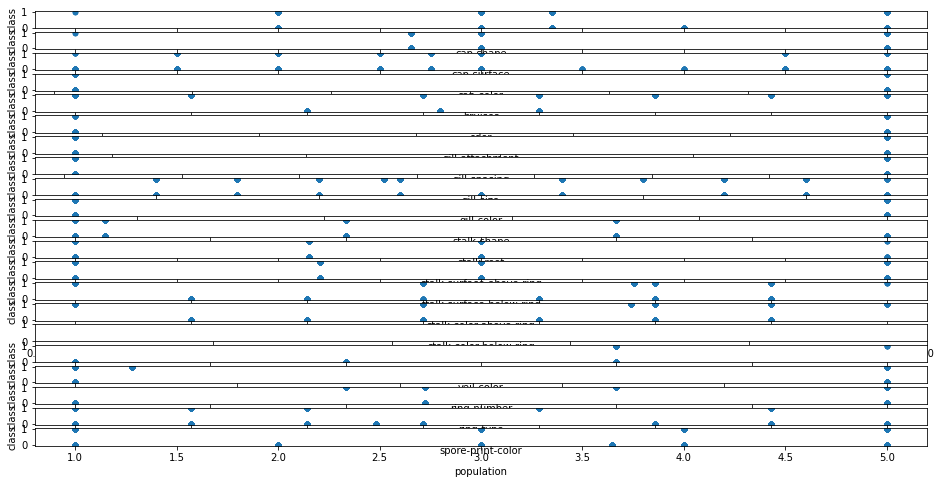

In [118]:
fig,axs=plt.subplots(21,1)
data.plot(kind='scatter',x='cap-shape',y='class',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='cap-surface',y='class',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='cap-color',y='class',ax=axs[2],figsize=(16,8))
data.plot(kind='scatter',x='bruises',y='class',ax=axs[3],figsize=(16,8))
data.plot(kind='scatter',x='odor',y='class',ax=axs[4],figsize=(16,8))
data.plot(kind='scatter',x='gill-attachment',y='class',ax=axs[5],figsize=(16,8))
data.plot(kind='scatter',x='gill-spacing',y='class',ax=axs[6],figsize=(16,8))
data.plot(kind='scatter',x='gill-size',y='class',ax=axs[7],figsize=(16,8))
data.plot(kind='scatter',x='gill-color',y='class',ax=axs[8],figsize=(16,8))
data.plot(kind='scatter',x='stalk-shape',y='class',ax=axs[9],figsize=(16,8))
data.plot(kind='scatter',x='stalk-root',y='class',ax=axs[10],figsize=(16,8))
data.plot(kind='scatter',x='stalk-surface-above-ring',y='class',ax=axs[11],figsize=(16,8))
data.plot(kind='scatter',x='stalk-surface-below-ring',y='class',ax=axs[12],figsize=(16,8))
data.plot(kind='scatter',x='stalk-color-above-ring',y='class',ax=axs[13],figsize=(16,8))
data.plot(kind='scatter',x='stalk-color-below-ring',y='class',ax=axs[14],figsize=(16,8))
data.plot(kind='scatter',x='veil-color',y='class',ax=axs[16],figsize=(16,8))
data.plot(kind='scatter',x='ring-number',y='class',ax=axs[17],figsize=(16,8))
data.plot(kind='scatter',x='ring-type',y='class',ax=axs[18],figsize=(16,8))
data.plot(kind='scatter',x='spore-print-color',y='class',ax=axs[19],figsize=(16,8))
data.plot(kind='scatter',x='population',y='class',ax=axs[20],figsize=(16,8))
data.plot(kind='scatter',x='habitat',y='class',ax=axs[21],figsize=(16,8))
fig.savefig('testdata1.jpg')


In [ ]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

# removing outliers

In [119]:
df_features=data.drop('class',axis=1)

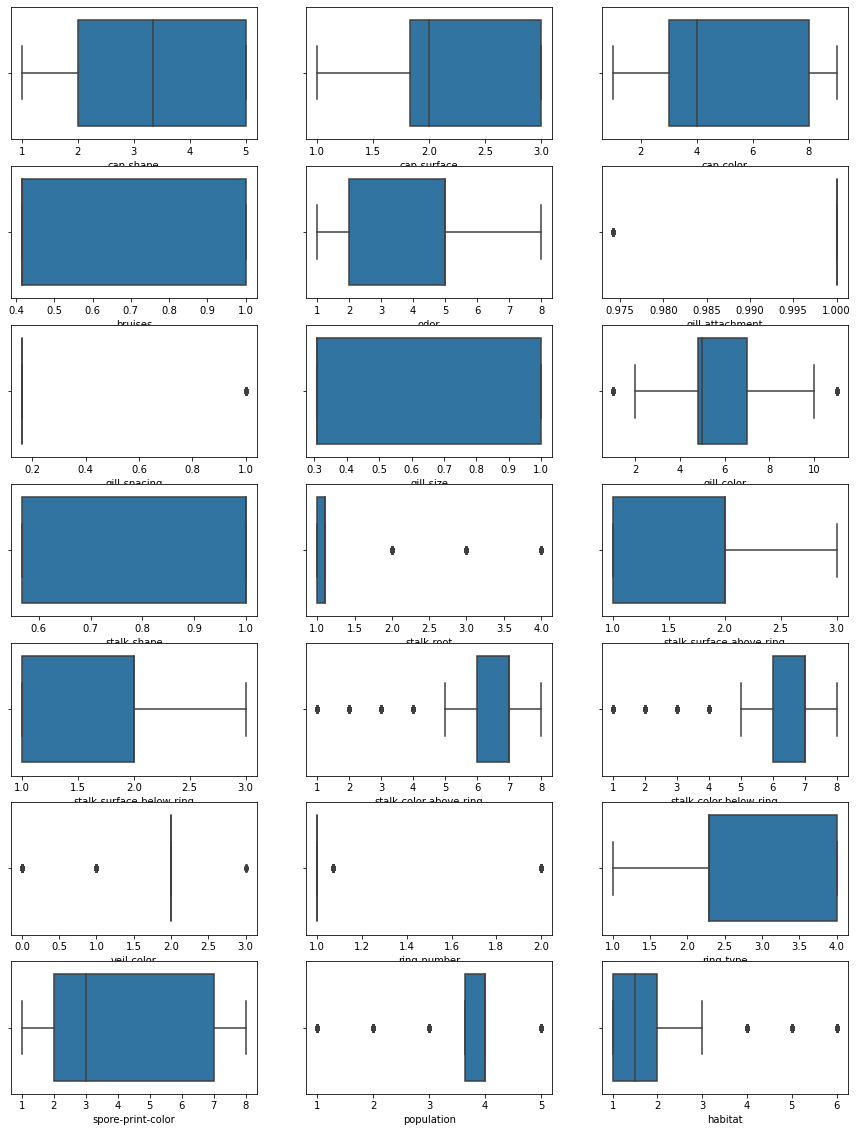

In [120]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<30:
        ax=plt.subplot(7,3,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

In [121]:
data.shape

(8124, 22)

In [122]:
#find the IQR to identify outliers
#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1
print(iqr)

class                       1.000000
cap-shape                   3.000000
cap-surface                 1.172329
cap-color                   5.000000
bruises                     0.584441
odor                        3.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.690793
gill-color                  2.189316
stalk-shape                 0.432792
stalk-root                  0.109798
stalk-surface-above-ring    1.000000
stalk-surface-below-ring    1.000000
stalk-color-above-ring      1.000000
stalk-color-below-ring      1.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   1.708026
spore-print-color           5.000000
population                  0.355982
habitat                     1.000000
dtype: float64


In [123]:
print(data < (q1 - 1.5 * iqr))

      class  cap-shape  cap-surface  cap-color  bruises   odor  \
0     False      False        False      False    False  False   
1     False      False        False      False    False  False   
2     False      False        False      False    False  False   
3     False      False        False      False    False  False   
4     False      False        False      False    False  False   
...     ...        ...          ...        ...      ...    ...   
8119  False      False        False      False    False  False   
8120  False      False        False      False    False  False   
8121  False      False        False      False    False  False   
8122  False      False        False      False    False  False   
8123  False      False        False      False    False  False   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0               False         False      False       False  ...   
1               False         False      False       False  ...   
2     

In [124]:
data.drop(['gill-attachment','veil-color','population'],axis=1,inplace=True)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,habitat
0,1,5.000000,2.0,4.0,1.000000,6.000000,0.161497,1.000000,4.0,0.567208,3.0,2.0,2.0,7.0,7.0,1.0,4.000000,2.0,5.0
1,0,5.000000,2.0,9.0,1.000000,4.144756,0.161497,0.309207,4.0,0.567208,2.0,2.0,2.0,7.0,7.0,1.0,4.000000,3.0,1.0
2,0,3.348104,2.0,8.0,1.000000,3.000000,0.161497,0.309207,5.0,0.567208,2.0,2.0,2.0,7.0,7.0,1.0,4.000000,3.0,3.0
3,1,5.000000,3.0,8.0,1.000000,6.000000,0.161497,1.000000,5.0,0.567208,3.0,2.0,2.0,7.0,7.0,1.0,4.000000,2.0,5.0
4,0,5.000000,2.0,3.0,0.415559,5.000000,1.000000,0.309207,4.0,1.000000,3.0,2.0,2.0,7.0,7.0,1.0,2.291974,3.0,1.0


In [125]:
data.drop(['bruises'],axis=1,inplace=True)
data.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,habitat
0,1,5.000000,2.0,4.0,6.000000,0.161497,1.000000,4.0,0.567208,3.0,2.0,2.0,7.0,7.0,1.0,4.000000,2.0,5.0
1,0,5.000000,2.0,9.0,4.144756,0.161497,0.309207,4.0,0.567208,2.0,2.0,2.0,7.0,7.0,1.0,4.000000,3.0,1.0
2,0,3.348104,2.0,8.0,3.000000,0.161497,0.309207,5.0,0.567208,2.0,2.0,2.0,7.0,7.0,1.0,4.000000,3.0,3.0
3,1,5.000000,3.0,8.0,6.000000,0.161497,1.000000,5.0,0.567208,3.0,2.0,2.0,7.0,7.0,1.0,4.000000,2.0,5.0
4,0,5.000000,2.0,3.0,5.000000,1.000000,0.309207,4.0,1.000000,3.0,2.0,2.0,7.0,7.0,1.0,2.291974,3.0,1.0


In [126]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'habitat'],
      dtype='object')

# model building

In [127]:
x=data.drop(columns=['class'])
y=data['class']

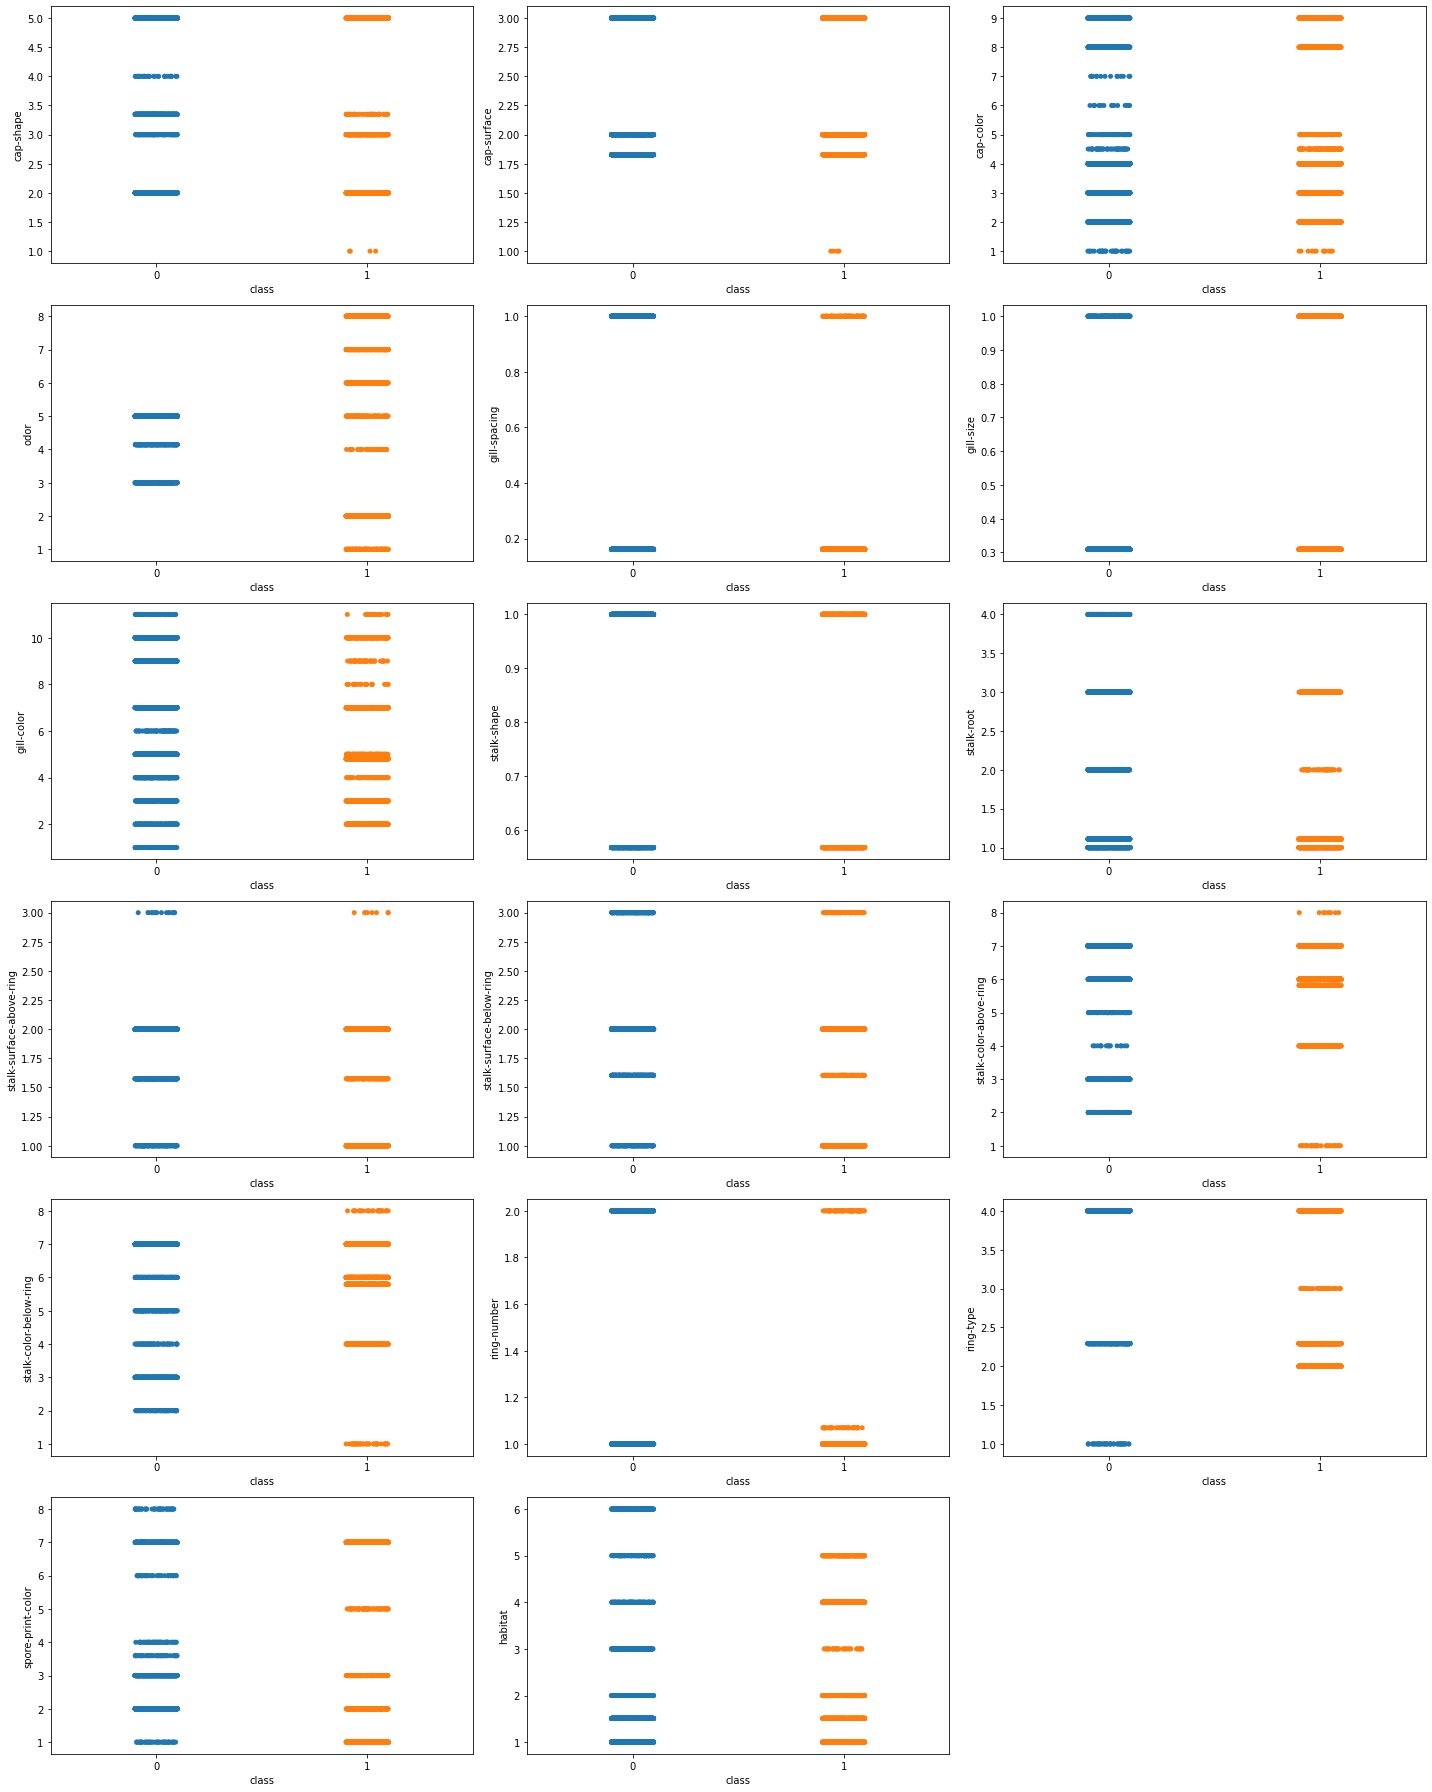

In [128]:
#lets see how feature are related with class
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()    
     
        
        

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 1.05905009, -0.6536575 , -0.24301106, ...,  1.01075633,
        -0.68376102,  2.20725327],
       [ 1.05905009, -0.6536575 ,  1.78942555, ...,  1.01075633,
        -0.26116498, -0.83010776],
       [-0.1346059 , -0.6536575 ,  1.38293823, ...,  1.01075633,
        -0.26116498,  0.68857276],
       ...,
       [-1.10874304, -0.6536575 , -0.24301106, ...,  1.01075633,
        -0.00898063, -0.0707675 ],
       [-0.38614533,  1.21604155, -0.24301106, ..., -0.85592284,
         1.42921918, -0.0707675 ],
       [ 1.05905009, -0.6536575 , -0.24301106, ...,  1.01075633,
         0.16143106, -0.0707675 ]])

In [131]:
x_scaled.shape[1]

17

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
#finding variance inflation factor in each scaled column
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.026824,cap-shape
1,1.179317,cap-surface
2,1.534401,cap-color
3,1.795471,odor
4,2.291933,gill-spacing
5,3.337517,gill-size
6,1.354552,gill-color
7,2.493329,stalk-shape
8,2.525366,stalk-root
9,2.062520,stalk-surface-above-ring


In [134]:
#lets split data in test and training set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR

In [136]:
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

LogisticRegression()

In [137]:
with open ('modelforprediction.say','wb')as f:
    pickle.dump(log_regression,f)
with open ('standardscalar.sav','wb')as f:
    pickle.dump(scalar,f)    

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
y_pred=log_regression.predict(x_test)

In [142]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9699655342195963